In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


Datensatz laden

In [2]:
df = pd.read_csv('heartdata.csv')

Datensatz bereinigen

In [3]:
df = df.drop(columns=['Unnamed: 0'])

Korrelationsmatrix 

In [5]:
print("Korrelationsmatrix:")
print(df.corr())
r_biking, p_biking = pearsonr(df['biking'], df['heartdisease'])
r_smoking, p_smoking = pearsonr(df['smoking'], df['heartdisease'])

print(f"\nPearson-Korrelation (Biking vs Heart Disease): r = {r_biking:.3f}, p = {p_biking:.3e}")
print(f"Pearson-Korrelation (Smoking vs Heart Disease): r = {r_smoking:.3f}, p = {p_smoking:.3e}")

Korrelationsmatrix:
                biking   smoking  heartdisease
biking        1.000000  0.015136     -0.935455
smoking       0.015136  1.000000      0.309131
heartdisease -0.935455  0.309131      1.000000

Pearson-Korrelation (Biking vs Heart Disease): r = -0.935, p = 3.550e-226
Pearson-Korrelation (Smoking vs Heart Disease): r = 0.309, p = 1.729e-12


In [ ]:
Histogramm

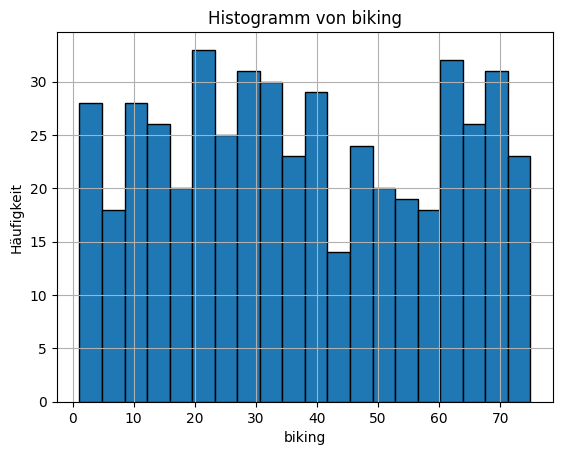

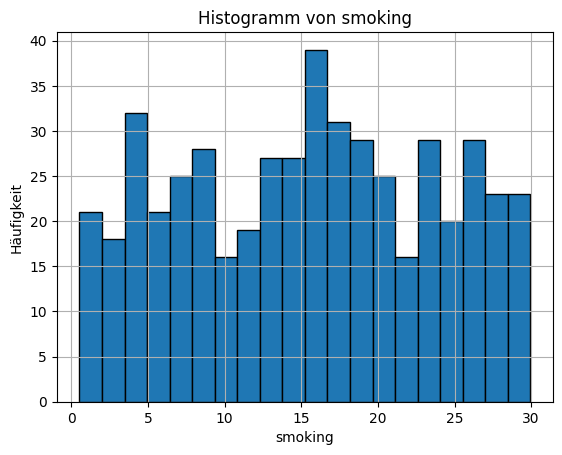

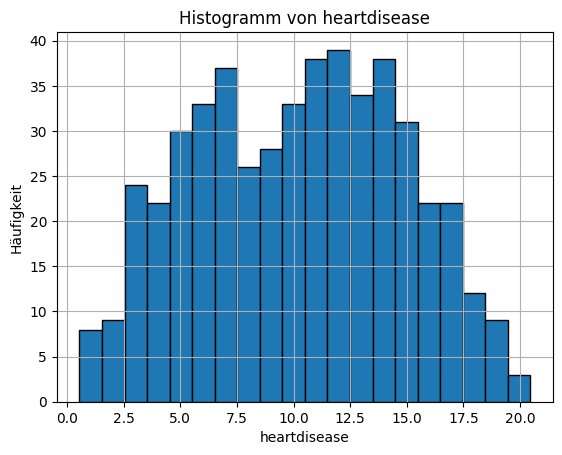

In [8]:
for column in df.columns:
    plt.figure()
    plt.hist(df[column], bins=20, edgecolor='black')
    plt.title(f'Histogramm von {column}')
    plt.xlabel(column)
    plt.ylabel('Häufigkeit')
    plt.grid(True)
    plt.show()
    

Beziehungen Visualisierung 
- Fahrad fahren -> weniger Herzkrankheiten
- Rauchen -> mehr Herzkrankheiten
- kein Zusammenhang zwischen Frahrrad fahren und Rauchen

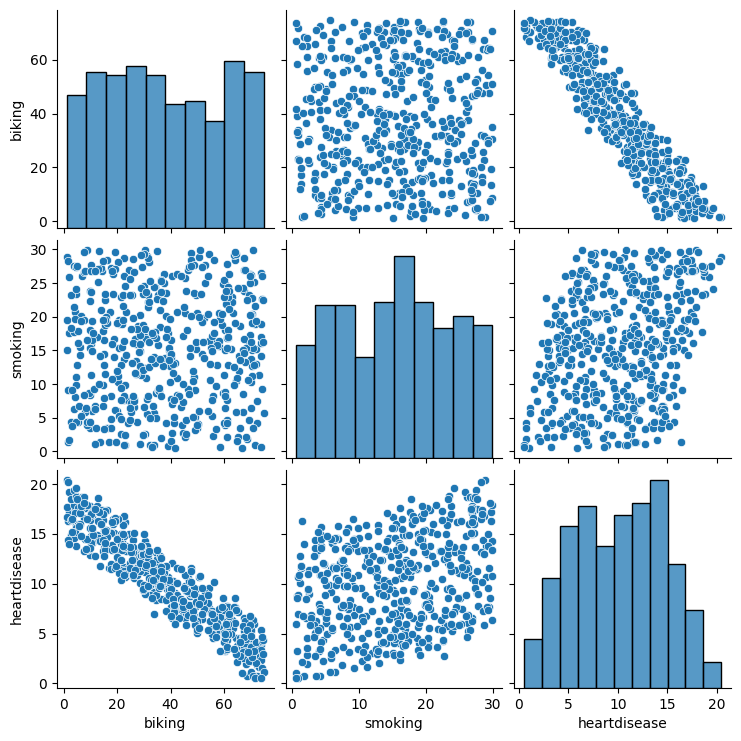

In [9]:
sns.pairplot(df)
plt.show()

Lineares Regressionsmodell

In [15]:
from sklearn.linear_model import LinearRegression

In [17]:
X = df[['biking', 'smoking']]
y = df['heartdisease']
model = LinearRegression()
model.fit(X, y)
print(f"Achsenabschnitt (intercept): {model.intercept_}")
print(f"Koeffizienten: {model.coef_}")

Achsenabschnitt (intercept): 14.984657987225845
Koeffizienten: [-0.20013305  0.17833391]
